In [135]:
import tensorflow as tf
import keras
import keras.layers as klayers
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from faker import Faker
fake = Faker()
model_name = fake.first_name() + "_" + fake.word()
model_name

'Sarah_dinner'

In [136]:

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=f'./logs/{model_name}', histogram_freq=1)

In [137]:
dataset = "features_3_sec.csv"
df = pd.read_csv(dataset)
df.sample(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
3925,disco.00093.1.wav,66149,0.500249,0.064884,0.206134,0.003429,2773.695154,2.072834e+05,2327.944708,68898.020870,...,27.490946,-9.717520,30.625570,2.074021,24.377047,-10.551721,30.905905,7.802427,55.350697,disco
2489,country.00049.4.wav,66149,0.320745,0.084855,0.150904,0.000897,1513.818094,1.231126e+05,1733.447183,83199.791406,...,38.967072,-7.213460,15.153365,-1.558656,25.950289,-1.119793,35.078716,-6.719873,35.688129,country
7907,pop.00091.5.wav,66149,0.407585,0.101610,0.243157,0.007961,3849.606301,1.002886e+06,3324.082492,187783.999826,...,37.580700,-8.776471,40.582752,-5.112784,45.362541,-5.847836,58.143726,-5.567794,29.197611,pop
971,blues.00097.1.wav,66149,0.377912,0.092656,0.185609,0.001907,1429.419458,3.612966e+05,1766.255920,228779.466106,...,92.179268,-16.183924,82.264008,-1.926760,76.202385,-7.309617,47.632946,-1.194780,58.375496,blues
9111,rock.00011.9.wav,66149,0.353670,0.085363,0.129777,0.000830,1272.319012,1.801978e+05,1907.906203,149882.137804,...,33.263546,-4.837713,43.707947,-0.905903,43.329994,-0.671540,52.114700,-6.092943,42.400211,rock
7367,pop.00037.5.wav,66149,0.430831,0.088232,0.252909,0.005956,3050.498312,6.974420e+05,2717.845005,142097.066398,...,49.211205,-1.203735,37.390751,-2.819972,71.958504,0.204269,92.554779,-4.364472,45.151314,pop
1037,classical.00003.7.wav,66149,0.251360,0.080084,0.021928,0.000052,1383.432756,6.086686e+04,1432.532738,42921.509543,...,52.653095,4.579178,91.699951,14.841140,68.493317,17.410540,89.170364,4.659767,50.942852,classical
5772,jazz.00078.0.wav,66149,0.271572,0.082917,0.128932,0.006538,2279.947708,3.421852e+05,2332.727474,163517.844235,...,43.312313,-6.366943,28.777195,-8.073256,71.477615,-9.449309,33.678120,-4.624969,84.153633,jazz
7900,pop.00090.8.wav,66149,0.384384,0.085736,0.206104,0.002071,3639.297387,7.401002e+05,3368.517179,69499.489146,...,30.408220,1.949817,36.541412,8.267164,38.876934,5.286991,31.516527,2.569825,26.894819,pop
2773,country.00077.8.wav,66149,0.350864,0.076344,0.131806,0.001497,1642.632653,1.329447e+05,1600.598273,123526.375492,...,40.537823,-15.757854,56.900097,3.162174,39.780861,-5.964333,38.388538,-2.097811,27.093142,country


In [138]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [139]:
df = df[[
    "label",
    "chroma_stft_mean",
    "rms_mean",
    "spectral_centroid_mean",
    "spectral_bandwidth_mean",
    "rolloff_mean",
    "zero_crossing_rate_mean",
    "harmony_mean",
    "perceptr_mean",
    "tempo",
    "mfcc1_mean",
    "mfcc2_mean",
    "mfcc3_mean",
    "mfcc4_mean",
    "mfcc5_mean",
]]


In [140]:
X = df.iloc[:,1:].transform(abs)
y = df.iloc[:,0]

In [141]:
le = LabelEncoder()
y = le.fit_transform(y)
y_cat = keras.utils.to_categorical(y)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y_cat, random_state=42)

In [143]:
X_train

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean
4721,0.434899,0.162669,2423.357375,2641.716773,4978.145282,0.103504,0.000016,0.000101,99.384014,138.379593,75.080261,2.696911,28.708660,23.636921
118,0.348643,0.073866,1380.074475,1837.308840,3133.743615,0.036974,0.000077,0.000035,89.102909,278.889069,119.442276,0.708458,46.159649,0.593047
2022,0.270834,0.156919,2021.217893,2327.972352,4304.073205,0.073821,0.000213,0.001167,161.499023,118.688309,86.391968,9.632529,40.835705,14.794098
9875,0.394370,0.069616,2464.323453,2114.655580,4842.320463,0.137943,0.001780,0.001176,92.285156,142.302673,90.587379,44.915874,46.837975,18.020609
5431,0.323400,0.100702,1928.172392,2021.388903,3983.311298,0.074170,0.001004,0.001104,143.554688,157.545807,105.583931,36.552494,44.437336,13.730971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.267750,0.097862,2383.639867,2562.185167,5218.406137,0.079286,0.000028,0.000019,83.354335,179.116684,75.628227,0.326564,28.678644,1.457522
5191,0.248258,0.041260,1393.173520,1860.369053,2993.198054,0.048622,0.000033,0.000335,172.265625,278.396637,124.573822,8.661338,50.231472,1.670915
5390,0.240019,0.083758,1204.024837,1388.025813,2453.625676,0.074020,0.000152,0.001017,99.384014,260.919403,149.435486,17.539568,63.019405,6.660944
860,0.365543,0.108228,1511.812830,1781.554997,2899.280161,0.072761,0.000011,0.000049,123.046875,212.680618,127.323952,10.032054,45.107521,6.636889


In [144]:
num_categories = y.max() + 1

model = keras.models.Sequential()
model.add(klayers.Dense(units=256, input_dim=X_train.shape[1], activation="relu"))
model.add(klayers.Dense(units=1000, activation="relu"))
model.add(klayers.Dropout(rate=0.2))
model.add(klayers.Dense(units=500, activation="relu"))
model.add(klayers.Dropout(rate=0.2))
model.add(klayers.Dense(units=num_categories, activation='softmax'))

In [145]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 256)               3840      
                                                                 
 dense_33 (Dense)            (None, 1000)              257000    
                                                                 
 dropout_16 (Dropout)        (None, 1000)              0         
                                                                 
 dense_34 (Dense)            (None, 500)               500500    
                                                                 
 dropout_17 (Dropout)        (None, 500)               0         
                                                                 
 dense_35 (Dense)            (None, 500)               250500    
                                                                 
 dropout_18 (Dropout)        (None, 500)              

In [146]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',keras.metrics.AUC(name="auc")])

In [147]:
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=100)

In [148]:
model.fit(
    x = X_train,
    y = y_train,
    epochs = 1000,
    batch_size = 100,
    validation_data = (X_test, y_test),
    steps_per_epoch = 100,
    verbose = 3,
    callbacks = [tensorboard_callback, early_stopping_callback]
)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

In [149]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 853us/step - loss: 1.1998 - accuracy: 0.6605 - auc: 0.9328


[1.1997743844985962, 0.6605284214019775, 0.9328435063362122]

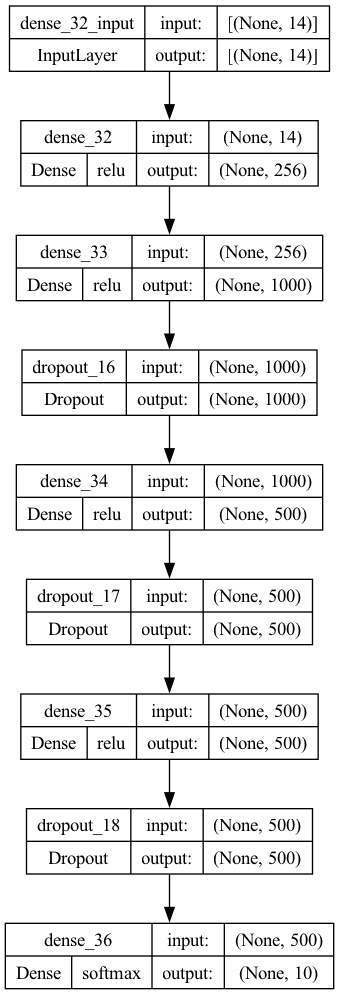

In [150]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)